# Calculation of intrinsic and total efficiencies for circular side of the detector

## Geometrical efficiency calculated from the previous part

In [1]:
import math
import numpy
from matplotlib import pyplot as plt
import pandas as pd
R=3.8
t=0.03
y=1
z=0
x_positions=[]
geo_eff_cir=[]
for i in numpy.arange(-3.6, 3.8, 0.2): 
    x_positions.append(i)
    geo_eff=0.5*(1-math.cos(numpy.arctan((R+t)/y)))*(y/math.sqrt(i*i + y*y + z*z))
    geo_eff_cir.append(geo_eff) 
print(geo_eff_cir)


with open("cir_geo_threein.csv", "w") as out_file:
     for number in geo_eff_cir:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_geo_threein.csv",names=['Calculation'])
data.to_csv("cir_geo_threeinupdated.csv")

for number in geo_eff_cir:
    print(number)

plt.scatter(x_positions,geo_eff_cir, color="none", edgecolor="red", label="Experimental")
plt.xlabel('Radial position x (cm)')
plt.ylabel('Geometrical efficiency (%)')
plt.savefig("cirthree_geo.pdf", bbox_inches='tight')
plt.show()

[0.10001482235548839, 0.10544166553831628, 0.11146125313531716, 0.1181699568771888, 0.1256842750721166, 0.13414553331627202, 0.143725467206075, 0.1546324559024365, 0.1671175556807643, 0.1814780686653393, 0.19805329770377214, 0.21720070047075998, 0.239228085043527, 0.2642360564756132, 0.2917999096060131, 0.32043328557224315, 0.3469589400873295, 0.3664294809420083, 0.3736862147357949, 0.3664294809420078, 0.34695894008732886, 0.32043328557224227, 0.29179990960601215, 0.2642360564756124, 0.23922808504352625, 0.21720070047075932, 0.19805329770377159, 0.18147806866533878, 0.16711755568076386, 0.15463245590243613, 0.14372546720607468, 0.13414553331627174, 0.12568427507211632, 0.11816995687718859, 0.11146125313531698, 0.10544166553831612, 0.10001482235548823]
0.10001482235548839
0.10544166553831628
0.11146125313531716
0.1181699568771888
0.1256842750721166
0.13414553331627202
0.143725467206075
0.1546324559024365
0.1671175556807643
0.1814780686653393
0.19805329770377214
0.21720070047075998
0.239

<Figure size 640x480 with 1 Axes>

## Calculation of the survival probability of photon inside the cover layer (similar to the cylindrical side)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.5942339524095632
0.5854709405673557
0.5789415443675165
0.5744059239726826
0.5715884128954485
0.5702047896745708
0.5699796868144101
0.5706561874760099
0.572000364582127
0.5738028765011068
0.5758789676327702
0.5780676682633098
0.5802306457839626
0.5822509607958295
0.5840318691651813
0.5854957478791182
0.5865831870718474
0.5872522709339567
0.58747805844897
0.587252270933956
0.5865831870718462
0.5854957478791184
0.5840318691651816
0.5822509607958292
0.5802306457839627
0.57806766826331
0.5758789676327698
0.5738028765011065
0.5720003645821271
0.5706561874760092
0.56997968681441
0.5702047896745704
0.5715884128954484
0.5744059239726829
0.5789415443675172
0.5854709405673566
0.594233952409564


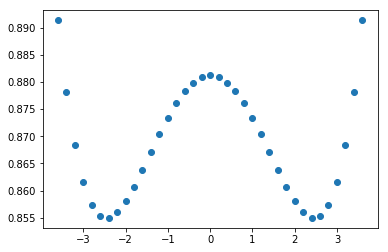

In [2]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=3.8
t=0.03
h=7.6
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-3.6, 3.8, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)
integral_survive=[x*1.5 for x in integral_survive]

plt.plot(y_positions,integral_survive, 'o')
plt.show()

In [3]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=3.8
t=0.03
h=7.6
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-3.6, 3.8, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


3017.5917035415414
2860.36685638484
2711.43108047799
2571.008348459432
2439.3093670652856
2316.5008175731623
2202.698901003629
2097.976003535649
2002.3715600589123
1915.9024742695738
1838.571429795965
1770.372906479321
1711.2972738903945
1661.3334511762423
1620.4705683232996
1588.6989643808024
1566.0107626611382
1552.4001862703967
1547.8637203536427
1552.4001862703976
1566.010762661139
1588.6989643808026
1620.4705683233017
1661.3334511762446
1711.2972738903989
1770.372906479326
1838.5714297959644
1915.9024742695779
2002.3715600589148
2097.976003535648
2202.6989010036277
2316.500817573162
2439.3093670652856
2571.0083484594384
2711.4310804780043
2860.3668563848596
3017.59170354155


-----------------------------
Thease are the products
2689.7331671306956
2511.9925106629844
2354.640145767017
2215.2036389074815
2091.4214545227715
1981.3197921979145
1883.2404446107407
1795.8344813907138
1718.0358935738705
1649.0255262472037
1588.19192536501
1535.0930070075594
1489.4206835366374
1450.9694972244276
1419.6096824175306
1395.2647324573777
1377.8933762258773
1367.4758021783819
1364.0039597654363
1367.4758021783812
1377.8933762258753
1395.2647324573784
1419.609682417533
1450.9694972244286
1489.4206835366415
1535.0930070075647
1588.1919253650083
1649.0255262472065
1718.0358935738727
1795.834481390711
1883.2404446107394
1981.3197921979126
2091.421454522771
2215.2036389074874
2354.6401457670327
2511.9925106630053
2689.7331671307065
THIS IS COEFFICIENT1
[0.5626633966200001, 0.5764834800000002, 0.602176, 0.629336, 0.658145, 0.692677, 0.7275139, 0.753133895015248, 0.7708550345267149, 0.7843666765840637]
These are the elements of products: 
1171.0425776395268
1093.658739329897
102

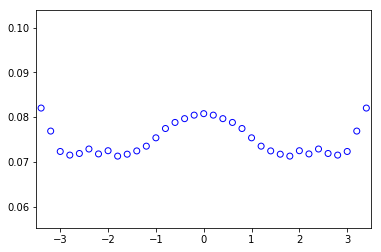

In [4]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   

First_extra_sublist=products[0:8]
First_sublist=products[8:18]
Second_sublist=products[19:29]
Second_extra_sublist=products[29:37]


Coefficient1=[0.5681*0.85*1.08*1.0789, 0.59309*0.9*1.08, 0.6208*0.97, 0.6488*0.97, 
              0.6785*0.97, 0.7141*0.97, 0.7606*0.9565, 0.8217*0.9565*0.95*1.0339*0.9756,
              0.8957*0.9565*0.95*0.9708*0.9756, 0.9669*0.9565*0.95*0.9708*0.9426*0.9756]
Coefficient1 = [x * 1 for x in Coefficient1]
First_extra_coefficient=[0.4*0.9375*0.9,0.4*0.9375*0.9,0.4*0.9375*0.9,0.4*0.9375*0.9,
                         0.4*0.9379*0.9422,0.4*0.9375,0.4,0.4*1.0329]
First_extra_coefficient=[x*1.29 for x in First_extra_coefficient]

def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)
Second_extra_coefficient=Reverse(First_extra_coefficient)

print("THIS IS COEFFICIENT1")
print(Coefficient1)

for num1, num2 in zip(First_extra_sublist, First_extra_coefficient):
    first_extra_list=(num1*num2)
    products1.append(first_extra_list)

for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*0.92*0.8797*0.9756 for i in products[18:19]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)

for num1, num2 in zip(Second_extra_sublist, Second_extra_coefficient):
    second_extra_list=(num1*num2)
    products1.append(second_extra_list)



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/37
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/37)
er=Sigma/(math.sqrt(37)) 



intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(0.15*(i/2000))
   
    
with open("cir_intr_threein.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_intr_threein.csv",names=['Calculation'])
data.to_csv("cir_intr_threeinupdated.csv")
    
    
print("This is the size of your y: ")
print(len(y_positions))
print("--------------------------------------------------------")
print("This is the size of your efficiency: ")
print(len(intrinsic_eff))
print("***********************************************************************************")
print("These are the values of intrinsic detection efficiency: ")
print(intrinsic_eff)
print("***********************************************************************************")
    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
plt.xlim(-3.5,3.5)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("cirthree_intr.pdf", bbox_inches='tight')
plt.show()



0.008784121152999787
0.008648789925410972
0.008569849924238466
0.00854762546136923
0.008989449647858562
0.009643019294555777
0.010474914013930236
0.01110033797375832
0.012116138658564894
0.012938968542123857
0.014205933182214017
0.01573764533119818
0.017587835464599362
0.01991784702757958
0.022602509717610332
0.025253855824447786
0.027639340197288444
0.02947748693304634
0.030184096627777057
0.02947748693304629
0.02763934019728835
0.025253855824447728
0.02260250971761029
0.01991784702757953
0.01758783546459935
0.015737645331198185
0.014205933182213961
0.01293896854212384
0.012116138658564875
0.011100337973758277
0.010474914013930203
0.009643019294555749
0.008989449647858541
0.008547625461369241
0.00856984992423851
0.008648789925411031
0.00878412115299981


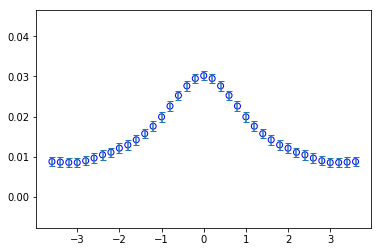

In [5]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=3.8
t=0.03
h=7.6
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-3.6, 3.8, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-3.6, 3.8, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geo_eff_cir,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/37
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/37)
er=Sigma/(math.sqrt(37)) 

with open("cir_total_threein.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_total_threein.csv",names=['Calculation'])
data.to_csv("cir_total_threeinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
#plt.ylim(0.01,0.045)
plt.savefig("cirthree_total.pdf", bbox_inches='tight')
plt.show()